# Inport Libraries

In [1]:
import numpy as np
import pandas as pd
import math as mt
from datetime import *
import calendar
import netCDF4 as nc
import xarray as xr

In [2]:
input_folder = '/g/data/u46/users/ext547/ewater/input_data/test/'
min_nc = 'min_celsius_Tair_WFDEI_201612.nc'
max_nc = 'max_celsius_Tair_WFDEI_201612.nc'
mean_nc = 'mean_celsius_Tair_WFDEI_201612.nc'

# Input variables and reformat datatypes

In [3]:
min_xr = xr.open_dataset(input_folder+min_nc, decode_times=False)
mean_xr = xr.open_dataset(input_folder+mean_nc, decode_times=False)
max_xr = xr.open_dataset(input_folder+max_nc, decode_times=False)

In [ ]:
# lat_shape = float(min_xr.lat.shape[0])
# lon_shape = float(min_xr.lon.shape[0])

In [ ]:
# for blah in min_xr.Tair:
#     print(print(blah.lat
    

In [ ]:
# min_xr.isel(time=0,lat = 0, lon = 0).Tair

In [ ]:
# result_array = np.empty((10, 10))

# num = 1

# for line in data_array:
#     result = do_stuff(line)
#     result_array = np.append(result_array, [result], axis=0)

In [ ]:
#  time.values[0]

In [ ]:
# [to_date(epoch, time_unit) for epoch in time.values.tolist()]

In [ ]:
# to_date()

In [ ]:
# time_unit = datetime.strptime(min_xr.time.units[14:], '%Y-%m-%d %H:%M:%S') 

In [4]:
def to_date(epoch, time_unit):
    time_unit =  datetime.strptime(time_unit, '%Y-%m-%d %H:%M:%S') 
    return time_unit + timedelta(seconds=epoch)

In [5]:
time = xr.DataArray([to_date(epoch, min_xr.time.units[14:]) for epoch in min_xr.time.values.tolist()], coords={'time': min_xr.time}, dims=('time',))
print(time)

<xarray.DataArray (time: 31)>
array(['2016-12-01T10:30:00.000000000', '2016-12-02T10:30:00.000000000',
       '2016-12-03T10:30:00.000000000', '2016-12-04T10:30:00.000000000',
       '2016-12-05T10:30:00.000000000', '2016-12-06T10:30:00.000000000',
       '2016-12-07T10:30:00.000000000', '2016-12-08T10:30:00.000000000',
       '2016-12-09T10:30:00.000000000', '2016-12-10T10:30:00.000000000',
       '2016-12-11T10:30:00.000000000', '2016-12-12T10:30:00.000000000',
       '2016-12-13T10:30:00.000000000', '2016-12-14T10:30:00.000000000',
       '2016-12-15T10:30:00.000000000', '2016-12-16T10:30:00.000000000',
       '2016-12-17T10:30:00.000000000', '2016-12-18T10:30:00.000000000',
       '2016-12-19T10:30:00.000000000', '2016-12-20T10:30:00.000000000',
       '2016-12-21T10:30:00.000000000', '2016-12-22T10:30:00.000000000',
       '2016-12-23T10:30:00.000000000', '2016-12-24T10:30:00.000000000',
       '2016-12-25T10:30:00.000000000', '2016-12-26T10:30:00.000000000',
       '2016-12-27T10

In [6]:
T_diff = max_xr.Tair - min_xr.Tair
print(T_diff)

<xarray.DataArray 'Tair' (time: 31, lat: 13, lon: 14)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [10.3974  , 10.045197, ...,  5.100708,  4.15564 ],
        [10.598358, 10.277405, ...,  3.838898,  3.10675 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [11.007935, 11.042419, ...,  5.167297,  4.03125 ],
        [11.131714, 11.088379, ...,  4.98468 ,  4.077362]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [10.202606, 10.410461, ...,  6.64856 ,  4.292999],
        [10.649719, 10.690002, ...,  6.801544,  4.13266 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [11.039459, 10.818054, ...,  2.886902,  

In [7]:
lat_rad = np.radians(min_xr.lat)
print(lat_rad)

<xarray.DataArray 'lat' (lat: 13)>
array([0.161443, 0.17017 , 0.178896, 0.187623, 0.19635 , 0.205076, 0.213803,
       0.222529, 0.231256, 0.239983, 0.248709, 0.257436, 0.266163],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 9.25 9.75 10.25 10.75 11.25 11.75 12.25 12.75 ...


In [8]:
def julian_days(epoch, time_unit):
    start_of_year = datetime.strptime('01/01/'+ str(time_unit),'%m/%d/%Y')
    epoch = start_of_year + timedelta(seconds=epoch)
    j_days = int((((epoch - start_of_year)+timedelta(days=1))/timedelta(days=1)) +1)
    return (j_days)


In [9]:
j_days = xr.DataArray([julian_days(epoch, 
                                   min_xr.time.units[14:18]) for epoch in time.time.values.tolist()], 
                      coords={'time': min_xr.time}, dims=('time',))
print(j_days)

<xarray.DataArray (time: 31)>
array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
Coordinates:
  * time     (time) float64 3.78e+04 1.242e+05 2.106e+05 2.97e+05 3.834e+05 ...


In [10]:
def leap_year(year):
    if calendar.isleap(int(year)) == True:
        print(str(year) +' is a leap year')
        ndy = 366
    else:
        print(str(year) +' is not a leap year')
        ndy = 365
    return(ndy)

ndy = leap_year( min_xr.time.units[14:18])
print(ndy)

2016 is a leap year
366


In [33]:
dr = 1 + 0.033 * np.cos(2 * np.pi * j_days / ndy)
print(dr)

<xarray.DataArray (time: 31)>
array([1.032981, 1.032956, 1.032922, 1.032879, 1.032825, 1.032762, 1.032689,
       1.032607, 1.032515, 1.032413, 1.032302, 1.032182, 1.032051, 1.031912,
       1.031763, 1.031605, 1.031437, 1.03126 , 1.031074, 1.030879, 1.030674,
       1.030461, 1.030238, 1.030007, 1.029767, 1.029518, 1.02926 , 1.028994,
       1.028719, 1.028436, 1.028145])
Coordinates:
  * time     (time) float64 3.78e+04 1.242e+05 2.106e+05 2.97e+05 3.834e+05 ...


In [34]:
sd = 0.409 * np.sin(2 * mt.pi * j_days / ndy - 1.39)
print('SD: '+str(sd))

SD: <xarray.DataArray (time: 31)>
array([-0.399572, -0.398014, -0.396339, -0.394547, -0.392639, -0.390616,
       -0.388477, -0.386223, -0.383856, -0.381376, -0.378783, -0.376079,
       -0.373264, -0.370338, -0.367304, -0.364161, -0.360912, -0.357555,
       -0.354094, -0.350528, -0.346858, -0.343087, -0.339214, -0.335242,
       -0.33117 , -0.327001, -0.322736, -0.318376, -0.313921, -0.309375,
       -0.304737])
Coordinates:
  * time     (time) float64 3.78e+04 1.242e+05 2.106e+05 2.97e+05 3.834e+05 ...


In [35]:
sa_X = 1 - (np.tan(lat_rad))**2 * ((np.tan(sd))**2)
print(sa_X)

<xarray.DataArray (lat: 13, time: 31)>
array([[0.99527 , 0.995311, 0.995355, ..., 0.997204, 0.99729 , 0.997376],
       [0.994735, 0.99478 , 0.994829, ..., 0.996888, 0.996983, 0.997079],
       [0.994169, 0.994219, 0.994273, ..., 0.996553, 0.996659, 0.996765],
       ...,
       [0.988498, 0.988598, 0.988704, ..., 0.993202, 0.99341 , 0.993619],
       [0.987639, 0.987746, 0.987861, ..., 0.992694, 0.992918, 0.993143],
       [0.986745, 0.98686 , 0.986983, ..., 0.992166, 0.992406, 0.992647]])
Coordinates:
  * lat      (lat) float32 9.25 9.75 10.25 10.75 11.25 11.75 12.25 12.75 ...
  * time     (time) float64 3.78e+04 1.242e+05 2.106e+05 2.97e+05 3.834e+05 ...


In [36]:
sa = mt.pi / 2 - np.arctan(-np.tan(lat_rad) * np.tan(sd) / np.sqrt(sa_X))
print(sa)

<xarray.DataArray (lat: 13, time: 31)>
array([[1.501968, 1.502267, 1.502589, ..., 1.517898, 1.518716, 1.519549],
       [1.49817 , 1.498486, 1.498825, ..., 1.514981, 1.515845, 1.516723],
       [1.49436 , 1.494692, 1.49505 , ..., 1.512055, 1.512964, 1.513889],
       ...,
       [1.463342, 1.463811, 1.464314, ..., 1.48825 , 1.489529, 1.49083 ],
       [1.459387, 1.459873, 1.460394, ..., 1.485217, 1.486543, 1.487892],
       [1.455411, 1.455915, 1.456455, ..., 1.482169, 1.483542, 1.484939]])
Coordinates:
  * lat      (lat) float32 9.25 9.75 10.25 10.75 11.25 11.75 12.25 12.75 ...
  * time     (time) float64 3.78e+04 1.242e+05 2.106e+05 2.97e+05 3.834e+05 ...


In [38]:
ra = 37.586 * dr * (sa * np.sin(lat_rad) * np.sin(sd) + np.cos(lat_rad) * np.cos(sd) * np.sin(sa))
print('RA: '+str(ra))

RA: <xarray.DataArray (time: 31, lat: 13)>
array([[31.571946, 31.325551, 31.077277, ..., 29.026158, 28.761992, 28.496174],
       [31.607783, 31.362039, 31.114409, ..., 29.068183, 28.804596, 28.539349],
       [31.645994, 31.400952, 31.154017, ..., 29.113078, 28.850117, 28.585487],
       ...,
       [33.333739, 33.125016, 32.914078, ..., 31.149039, 30.918999, 30.686928],
       [33.418506, 33.211859, 33.00298 , ..., 31.253831, 31.0257  , 30.795521],
       [33.504145, 33.299622, 33.092852, ..., 31.359972, 31.133797, 30.905556]])
Coordinates:
  * time     (time) float64 3.78e+04 1.242e+05 2.106e+05 2.97e+05 3.834e+05 ...
  * lat      (lat) float32 9.25 9.75 10.25 10.75 11.25 11.75 12.25 12.75 ...


In [39]:
ra = 37.586 * dr * (sa * np.sin(lat_rad) * np.sin(sd) + np.cos(lat_rad) * np.cos(sd) * np.sin(sa))
print(ra)

<xarray.DataArray (time: 31, lat: 13)>
array([[31.571946, 31.325551, 31.077277, ..., 29.026158, 28.761992, 28.496174],
       [31.607783, 31.362039, 31.114409, ..., 29.068183, 28.804596, 28.539349],
       [31.645994, 31.400952, 31.154017, ..., 29.113078, 28.850117, 28.585487],
       ...,
       [33.333739, 33.125016, 32.914078, ..., 31.149039, 30.918999, 30.686928],
       [33.418506, 33.211859, 33.00298 , ..., 31.253831, 31.0257  , 30.795521],
       [33.504145, 33.299622, 33.092852, ..., 31.359972, 31.133797, 30.905556]])
Coordinates:
  * time     (time) float64 3.78e+04 1.242e+05 2.106e+05 2.97e+05 3.834e+05 ...
  * lat      (lat) float32 9.25 9.75 10.25 10.75 11.25 11.75 12.25 12.75 ...


In [43]:
pet = 0.0009384 * (mean_xr.Tair + 17.8) * np.sqrt(T_diff) * ra
print(pet)

<xarray.DataArray (time: 31, lat: 13, lon: 14)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [3.64976 , 3.577187, ..., 2.360201, 2.1064  ],
        [3.668078, 3.61835 , ..., 1.955232, 1.849853]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [3.819649, 3.81742 , ..., 2.461986, 2.152063],
        [3.834061, 3.832885, ..., 2.332903, 2.213133]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [3.718209, 3.745368, ..., 2.78914 , 2.218399],
        [3.807249, 3.821603, ..., 2.693058, 2.214147]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [3.993673, 3.927515, ..., 1.918625, 1.72155 ],
        [3.981129, 3.933888, ..., 1.901527, 1.78315 ]]])

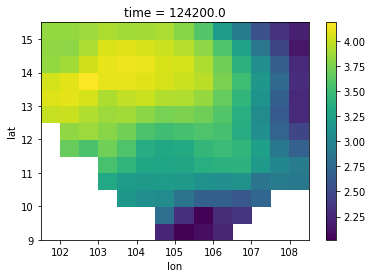

In [49]:
pet.isel(time=1).plot()

In [ ]:

# #Save time variable
# time_unit = datetime.strptime(min_xr.time.units[14:], '%Y-%m-%d %H:%M:%S') 
# time_seconds = int(min_xr.time.isel(time=time_index).values)
# date = time_unit + timedelta(seconds = time_seconds)
# print('date: '+str(date))

# #Save coordinates
# lat_deg = float(min_xr.isel(time = time_index).lat[lat_index].values)
# lon_deg = float(min_xr.isel(time = time_index).lon[lon_index].values)
# print('lat: '+str(lat_deg))
# print('lon: '+str(lon_deg))



# #Save temperature varaibles
# T_min =  float(min_xr.sel(time = time_seconds, lat = lat_deg, lon = lon_deg).Tair)
# T_mean = float(mean_xr.sel(time = time_seconds, lat = lat_deg, lon = lon_deg).Tair)
# T_max = float(max_xr.sel(time = time_seconds, lat = lat_deg, lon = lon_deg).Tair)
# print('Minimum temp: '+ str(T_min))
# print('Mean temp: '+ str(T_mean))
# print('Maximum temp: '+ str(T_max))

# # Calculate temperature difference
# # Units: T_diff in degrees C
# # Example: T_diff = 34.8 - 25.6 = 9.2 degrees C

# T_diff = T_max - T_min
# print('T_DIFF: ' +str(T_diff))

# # Convert latitude to radians
# # Unit: lat_rad in radians (northern hemisphere)
# # Example: lat_rad = (pi / 180) * 13.73 = + 0.240 radians

# lat_rad = (mt.pi / 180) * lat_deg 

# print('LAT_RAD'+str(lat_rad))

# # Convert date to julian day of the year
# # Unit: j_days in julian days
# # Example: j_days = days between ("15/4/2015","1/1/2015") + 1 = 105 julian days

# start_of_year = datetime.strptime('01/01/'+ str(date.year),'%m/%d/%Y') #save first day of year as variable
# j_days = int(((date - start_of_year)+timedelta(days=1))/timedelta(days=1)) #calculate julian days
# print('J_DAYS: '+str(j_days))

# Calculate the number of days in the year to account for leap year
# Units: ndy in days

# def leap_year(year):
#     if calendar.isleap(year) == True:
#         print(str(year) +' is a leap year')
#         ndy = 366
#     else:
#         print(str(year) +' is not a leap year')
#         ndy = 365
    

# print('NDY: '+str(ndy))

# Caclulate the inverse relative distance between the Earth and the Sun
# Unit: dr in radians
# Example: dr = 1 + 0.033* cos(2*pi*105/365) = 0.992 radians

# dr = 1 + 0.033 * mt.cos(2 * mt.pi * j_days / ndy)
# print('DR: '+str(dr))

# Calculate solar declination
# Unit: sd in radians
# Example: sd = 0.409 * sin(2 * pi * 105 / 365 - 1.39) = 0.166 radians

# sd = 0.409 * mt.sin(2 * mt.pi * j_days / 365 - 1.39)
# print('SD: '+str(sd))

# Calculate a sunset angle input variable
# Unit: no unit
# Example: sa_X = 1 - [tan(0.24)]^2 * [tan(0.166)]^2 = 0.998

# sa_X = 1 - (mt.tan(lat_rad))**2 * ((mt.tan(sd))**2)
# print('SA_X: '+str(sa_X))

# Calculate sunset angle
# Units: sa in radians
# Example: sa = pi / 2 - arctan(-tan(0.24) * tan(0.166) / sqrt(0.998)) = 1.612 radians

# sa = mt.pi / 2 - mt.atan(-mt.tan(lat_rad) * mt.tan(sd) / mt.sqrt(sa_X))
# print('SA: '+str(sa))

# Calcualte extraterrestrial radiation
# Units: ra in MJ / (m^ day)
# Example: ra = 37.586 * 0.992 * (1.612 * sin(0.24) * sin(0.166) + cos(0.24) * cos(0.166) * sin(1.612)) = 38.06 MJ / (m^ day)

# ra = 37.586 * dr * (sa * mt.sin(lat_rad) * mt.sin(sd) + mt.cos(lat_rad) * mt.cos(sd) * mt.sin(sa))
# print('RA: '+str(ra))


# Calculate Potential Evapotranspiration
# Units: PET in mm/day
# Example: PET = 0.0009384 * (30.2 + 17.8) * sqrt(9.2) * 38.06 = 5.2 mm/day
pet = 0.0009384 * (T_mean + 17.8) * mt.sqrt(T_diff) * ra
print('PET: '+str(pet))


####Create array with values
lat_deg
lon_deg
date
PET

test_array = np.nan()
#create an xarray
#create netcdf of PET


In [ ]:
# #Save time variable
# time_unit = datetime.strptime(min_xr.time.units[14:], '%Y-%m-%d %H:%M:%S') 
# time_seconds = int(min_xr.time.isel(time=time_index).values)
# date = time_unit + timedelta(seconds = time_seconds)
# print('date: '+str(date))

# #Save coordinates
# lat_deg = float(min_xr.isel(time = time_index).lat[lat_index].values)
# lon_deg = float(min_xr.isel(time = time_index).lon[lon_index].values)
# print('lat: '+str(lat_deg))
# print('lon: '+str(lon_deg))

# #Save temperature varaibles
# T_min =  float(min_xr.sel(time = time_seconds, lat = lat_deg, lon = lon_deg).Tair)
# T_mean = float(mean_xr.sel(time = time_seconds, lat = lat_deg, lon = lon_deg).Tair)
# T_max = float(max_xr.sel(time = time_seconds, lat = lat_deg, lon = lon_deg).Tair)
# print('Minimum temp: '+ str(T_min))
# print('Mean temp: '+ str(T_mean))
# print('Maximum temp: '+ str(T_max))

## Calculate max and min temperature difference

In [ ]:
# # Calculate temperature difference
# # Units: T_diff in degrees C
# # Example: T_diff = 34.8 - 25.6 = 9.2 degrees C

# T_diff = T_max - T_min
# print(T_diff)

## Convert latitude

In [ ]:
# # Convert latitude to radians
# # Unit: lat_rad in radians (northern hemisphere)
# # Example: lat_rad = (pi / 180) * 13.73 = + 0.240 radians

# lat_rad = (mt.pi / 180) * lat_deg 

# print(lat_rad)

## Calculate days and dates

In [ ]:
# # Convert date to julian day of the year
# # Unit: j_days in julian days
# # Example: j_days = days between ("15/4/2015","1/1/2015") + 1 = 105 julian days

# start_of_year = datetime.strptime('01/01/'+ str(date.year),'%m/%d/%Y') #save first day of year as variable
# j_days = int(((date - start_of_year)+timedelta(days=1))/timedelta(days=1)) #calculate julian days
# print(j_days)

In [ ]:
# # Calculate the number of days in the year to account for leap year
# # Units: ndy in days

# if calendar.isleap(date.year) == True:
#     print(str(date.year) +' is a leap year')
#     ndy = 366
# else:
#     print(str(date.year) +' is not a leap year')
#     ndy = 365
    

# print('There are '+str(ndy)+' days')

## Calculate extraterrestrial radiation

In [ ]:
# # Caclulate the inverse relative distance between the Earth and the Sun
# # Unit: dr in radians
# # Example: dr = 1 + 0.033* cos(2*pi*105/365) = 0.992 radians

# dr = 1 + 0.033 * mt.cos(2 * mt.pi * j_days / ndy)
# print (dr)

In [ ]:
# # Calculate solar declination
# # Unit: sd in radians
# # Example: sd = 0.409 * sin(2 * pi * 105 / 365 - 1.39) = 0.166 radians

# sd = 0.409 * mt.sin(2 * mt.pi * 105 / 365 - 1.39)
# print(sd)

In [ ]:
# # Calculate a sunset angle input variable
# # Unit: no unit
# # Example: sa_X = 1 - [tan(0.24)]^2 * [tan(0.166)]^2 = 0.998

# sa_X = 1 - (mt.tan(lat_rad))**2 * ((mt.tan(sd))**2)
# print(sa_X)

In [ ]:
# # Calculate sunset angle
# # Units: sa in radians
# # Example: sa = pi / 2 - arctan(-tan(0.24) * tan(0.166) / sqrt(0.998)) = 1.612 radians

# sa = mt.pi / 2 - mt.atan(-mt.tan(lat_rad) * mt.tan(sd) / mt.sqrt(sa_X))
# print(sa)

In [ ]:
# # Calcualte extraterrestrial radiation
# # Units: ra in MJ / (m^ day)
# # Example: ra = 37.586 * 0.992 * (1.612 * sin(0.24) * sin(0.166) + cos(0.24) * cos(0.166) * sin(1.612)) = 38.06 MJ / (m^ day)

# ra = 37.586 * dr * (sa * mt.sin(lat_rad) * mt.sin(sd) + mt.cos(lat_rad) * mt.cos(sd) * mt.sin(sa))
# print(ra)

## Calculate Potential Evapotranspiration

In [ ]:
# # Calculate Potential Evapotranspiration
# # Units: PET in mm/day
# # Example: PET = 0.0009384 * (30.2 + 17.8) * sqrt(9.2) * 38.06 = 5.2 mm/day
# pet = 0.0009384 * (T_mean + 17.8) * mt.sqrt(T_diff) * ra
# print(pet)

In [ ]:
# #Input variables
# #latitude (in degrees and minutes)
# input_lat = '13 44 N'
# #date (in mm/dd/yyyy)
# input_date = '04/15/2015'
# #daily maximum temperature (degrees C)
# input_Tmax =  '34.8'
# #daily mean temperature (degrees C)
# input_Tmean = '30.2'
# #daily minimum temperature (degrees C)
# input_Tmin = '25.6'

In [ ]:
# #Reformat datatypes
# lat_deg = int(input_lat.split(' ')[0])
# lat_min = int(input_lat.split(' ')[1])
# T_max= float(input_Tmax)
# T_mean = float(input_Tmean)
# T_min = float(input_Tmin)
# date = datetime.strptime(input_date,'%m/%d/%Y') #convert to datetime format
# year = date.year #save year as variable

In [ ]:
#Convert latitude to decimal degree
#Unit: lat_deg in decimal degrees
#Example: lat_deg = 13 + 44 / 60 = 13.73 decimal degrees

# lat_deg = lat_deg + lat_min/int(60)

# print(lat_deg)